In [44]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

# train test split and modeling modules from sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#importing my acquire script
import acquire
import prepare
import explore

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [45]:
# reading in telco churn data using function in acquire module
telco_df = acquire.get_telco_data()
telco_df.head()
# telco_df[['contract_type_id', 'contract_type']].value_counts()


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [51]:
telco_df.payment_type_id.value_counts(normalize=True)

1    0.335794
2    0.228880
3    0.219225
4    0.216101
Name: payment_type_id, dtype: float64

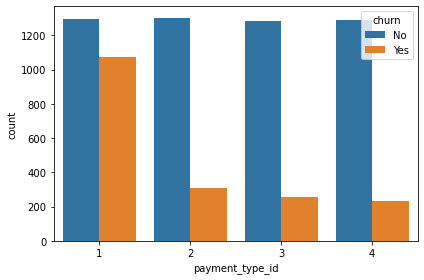

In [34]:
# churn by payment type
telco_df[['payment_type_id', 'payment_type']].value_counts()
sns.countplot(data=telco_df, x='payment_type_id', hue='churn')
plt.tight_layout()

In [19]:
telco_df[['payment_type_id', 'payment_type']].value_counts()



payment_type_id  payment_type             
1                Electronic check             2365
2                Mailed check                 1612
3                Bank transfer (automatic)    1544
4                Credit card (automatic)      1522
dtype: int64

In [14]:
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


internet_service_type_id  internet_service_type
2                         Fiber optic              3096
1                         DSL                      2421
3                         None                     1526
dtype: int64


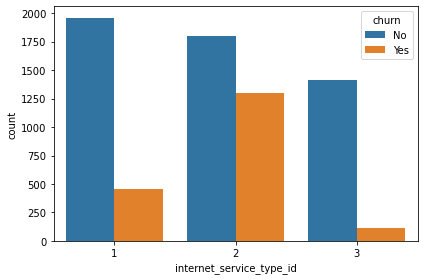

In [18]:
# telco_df[['contract_type_id', 'contract_type']].value_counts()
# telco_df['internet_service_type'].value_counts()
print(telco_df[['internet_service_type_id', 'internet_service_type']].value_counts())
sns.countplot(data=telco_df, x='internet_service_type_id', hue='churn')
plt.tight_layout()
# greatest churn in internet service 2 which is fiber

In [4]:
# # describes the df, object and numeric cols
# acquire.get_data_summary(telco_df)

# # shows distribution of individual variables
# acquire.get_viz(telco_df)


### Acquire Takeaways:
- Churn is our target variable
- payment_type_id == payment type. We will keep the payment type id column since that is numeric
- We will encode payment type to show the different payment types as numeric
- internet_service type id column is the same as internet service type column. We will keep the internet service type id column since that is numeric
- contract type id column is the same as contract type column. We will keep the contract type id column since that is numeric  and encode the contract type column to check for each contract category
- binary categorical columns like gender, partner, dependents will have to be encoded to be numeric
- total charges column has an object dtype - will have to change to float
- we will drop the customer id column 
- Some customers had no total charges -  this was where the tenure was 0 so must be new customers

In [15]:
dummy_df= pd.get_dummies(telco_df[['gender', 'partner', 'dependents','phone_service',
                                'paperless_billing', 'churn' ]], dummy_na=False, 
                            drop_first=[True, True, True, True, True, True])

In [16]:
dummy_df.head()

,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,paperless_billing_Yes,churn_Yes
0,0,1,1,1,1,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,1,1,1,0,1,0
4,1,1,0,1,1,0


In [17]:
dummy_df = dummy_df.rename(columns={'partner_Yes': 'has_partner', 'dependents_Yes': 'has_dependents', 'phone_service_Yes': 'has_phone_service', 
                                        'paperless_billing_Yes': 'has_paperless_billing','churn_Yes': 'churned'    
                            })

In [10]:
dummy_df.head()

,gender_Male,has_partner,has_dependents,has_phone_service,has_paperless_billing,churned
0,0,1,1,1,1,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,1,1,1,0,1,0
4,1,1,0,1,1,0


In [18]:
telco_df = pd.concat([telco_df, dummy_df], axis=1)
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_Male,has_partner,has_dependents,has_phone_service,has_paperless_billing,churned
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check,0,1,1,1,1,0
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic),1,0,0,0,0,0
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic),0,0,0,0,0,0
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic),1,1,1,0,1,0
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic),1,1,0,1,1,0


In [29]:
encode_nointernet_cols = ['online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies']
def encoding_cols(df, ec_list):
    for x in ec_list:
        newcol = "encoded_"+ x 
        df[newcol] = df[x].map({'Yes':1, 'No':0, 'No internet service':0})

In [30]:
encoding_cols(telco_df, encode_nointernet_cols)

In [43]:
telco_df.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [39]:
for x in telco_df['internet_service_type']:
    if x == 'Fiber optic':
        x = 1
    else:
        x = 0

# Prepare

In [19]:
train, validate, test = prepare.prep_telco_data(telco_df)
#telco_df.head()

There are no duplicate rows in your dataset.
Total charges has been converted from object to a float data type.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5642 to 6840
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           3943 non-null   int64  
 1   internet_service_type_id  3943 non-null   int64  
 2   contract_type_id          3943 non-null   int64  
 3   customer_id               3943 non-null   object 
 4   senior_citizen            3943 non-null   int64  
 5   tenure                    3943 non-null   int64  
 6   multiple_lines            3943 non-null   object 
 7   online_security           3943 non-null   object 
 8   online_backup             3943 non-null   object 
 9   device_protection         3943 non-null   object 
 10  tech_support              3943 non-null   object 
 11  streaming_tv              3943 non-null   object 
 12  str

In [6]:
train.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,has_partner,has_dependents,has_phone_service,has_single_line,has_multiple_lines,has_online_security,online_backup_No internet service,has_online_backup,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,has_fiber,has_internet_service
5642,4,3,2,1982-FEBTD,0,23,25.60,514.75,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1
3338,3,2,1,8982-NHAVY,0,27,100.50,2673.45,1,0,0,1,0,1,0,0,0,1,0,1,1,1,0,1,0
4273,1,2,0,4115-NZRKS,1,7,89.15,574.35,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0
2382,3,1,0,9633-DENPU,0,47,58.60,2723.40,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
2655,4,2,2,5693-PIPCS,0,41,99.65,4220.35,1,0,0,1,0,0,0,0,1,0,1,1,1,1,0,1,0


In [8]:
train[['online_backup_No internet service','has_online_backup']].value_counts()

online_backup_No internet service  has_online_backup
0                                  0                    1703
                                   1                    1402
1                                  0                     838
dtype: int64

In [52]:
train, validate, test = prepare.train_validate_test_split(telco_df, 'churn_Yes')

In [8]:
# check number of rows and columns in the three data splits
train.shape, validate.shape, test.shape

((3943, 29), (1691, 29), (1409, 29))

### Prepare Takeaways:

- There are no duplicates in the dataset
- I dropped the customer id column 
- I changed the total charges which were empty to null values and then replaced them with the same value as the monthly charges for new customers.
- Then I changed total charges to a float
- Encoded categorical variables
- Split the data set into train, validate and test

# Explore

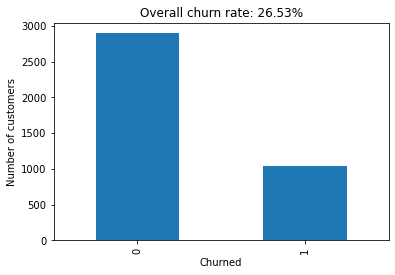

In [9]:
train.churn_Yes.value_counts().sort_index().plot.bar()
churn_rate = train.churn_Yes.mean()
plt.title(f'Overall churn rate: {churn_rate:.2%}')
plt.xlabel('Churned')
plt.ylabel('Number of customers')
plt.show()

### Takeaways:
   
   - Overall churn rate is not very high
   - However, we want to explore ways to reduce churn so we can increase customer retention

In [10]:
# setting rc parameters for visualizations
plt.rc('font', size=14)
plt.rc('figure', figsize=(14, 10))

#### quick look at the training dataset

In [93]:
train.head()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,has_partner,has_dependents,has_phone_service,has_single_line,has_multiple_lines,online_security_No internet service,has_online_security,online_backup_No internet service,has_online_backup,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,has_1yr_contract,has_2yr_contract,has_fiber,has_internet_service,pay_by_card,pay_echeck,pay_mailcheck
5642,4,3,3,0,23,25.60,514.75,0,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0
3338,3,2,2,0,27,100.50,2673.45,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0
4273,1,2,1,1,7,89.15,574.35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0
2382,3,1,1,0,47,58.60,2723.40,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2655,4,2,3,0,41,99.65,4220.35,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0


## Exploring Churn Rate by features

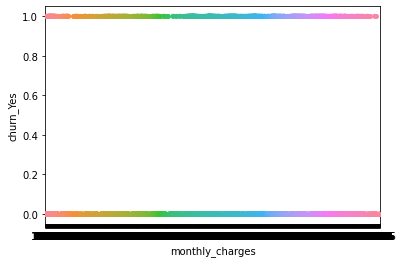

In [79]:
# %%time
# Create a stripplot to examine the distribution of species throughout each continuous variable.
# sns.stripplot(data=train, x='monthly_charges', y='churn_Yes', hue='pay_echeck')
sns.stripplot(x='monthly_charges', y='churn_Yes', data=train)
# plt.title('petal_length and petal_width show clear distinctions in measurements by species')

plt.show()

In [98]:
def plot_all_continuous_vars(train, target, quant_vars):
    '''
    Melt the dataset to "long-form" representation
    boxenplot of measurement x value with color representing survived. 
    '''
    my_vars = [item for sublist in [quant_vars, [target]] for item in sublist]
    sns.set(style="whitegrid", palette="muted")
    melt = train[my_vars].melt(id_vars=target, var_name="measurement")
    plt.figure(figsize=(8,6))
    p = sns.boxenplot(x="measurement", y="value", hue=target, data=melt)
    p.set(yscale="log", xlabel='')    
    plt.show()


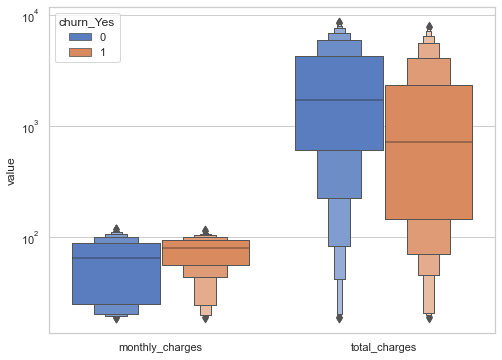

In [100]:
quant_vars = ['monthly_charges', 'total_charges']
plot_all_continuous_vars(train, 'churn_Yes', quant_vars)

In [110]:
def plot_swarm_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(20, 8), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.swarmplot(x=cat, y=quant, data=train, ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()
        
    

In [111]:
cat_vars = ['gender_Male','has_partner','has_dependents']

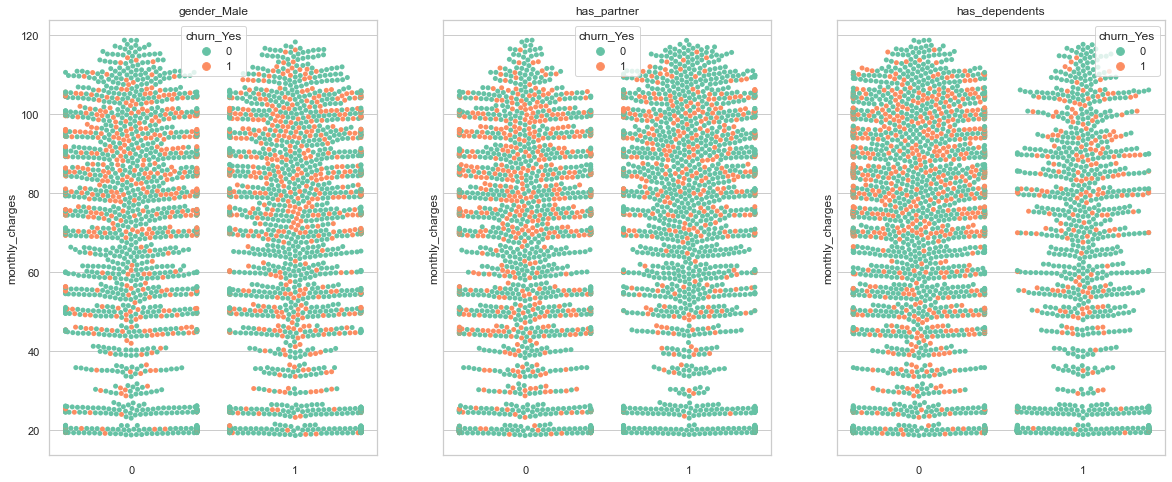

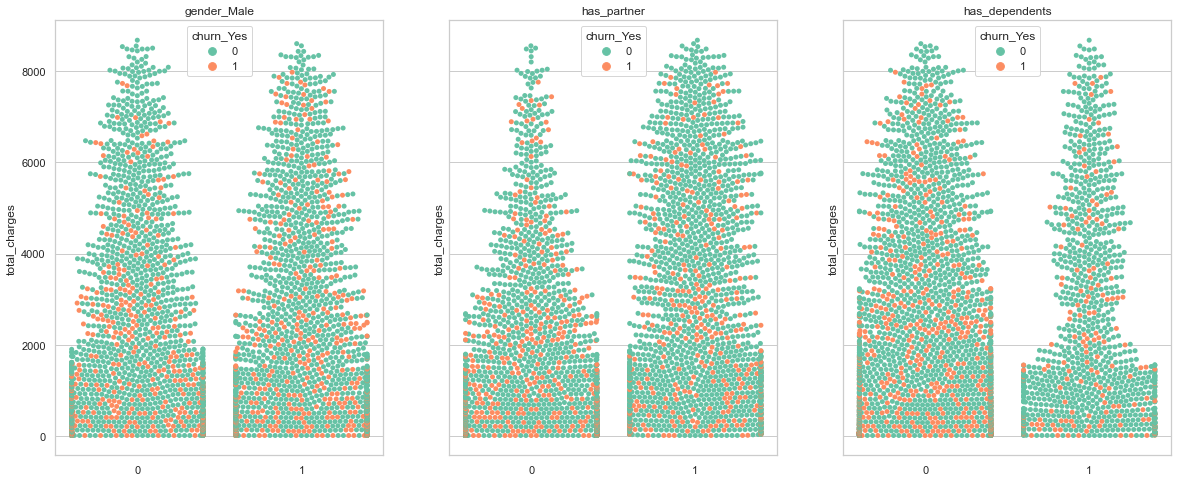

In [112]:
plot_swarm_grid_with_color(train, 'churn_Yes', cat_vars, quant_vars)

(array([1503.,  688.,  364.,  299.,  260.,  229.,  217.,  176.,  133.,
          74.]),
 array([  18.8 ,  883.93, 1749.06, 2614.19, 3479.32, 4344.45, 5209.58,
        6074.71, 6939.84, 7804.97, 8670.1 ]),
 <BarContainer object of 10 artists>)

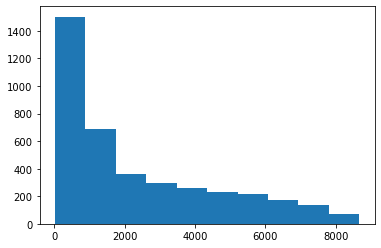

In [31]:
# distribution of total charges >> not exactly normal
plt.hist(train.total_charges)

(array([886., 108., 202., 370., 263., 485., 533., 483., 435., 178.]),
 array([ 18.55,  28.56,  38.57,  48.58,  58.59,  68.6 ,  78.61,  88.62,
         98.63, 108.64, 118.65]),
 <BarContainer object of 10 artists>)

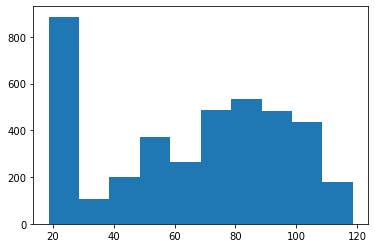

In [30]:
# dist of monthly charges >> although not exactly normal the sample size
#  is large enough 
plt.hist(train.monthly_charges)

<AxesSubplot:>

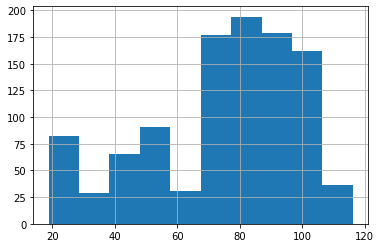

In [37]:
# plot distribution of montly charges for customer who churn

churn_sample = train[train.churn_Yes== 1].monthly_charges
churn_sample.hist()

B. Set Hypothesis

$H_{0}$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers
$H_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers

In [43]:
#C. set alpha
# we decide on 99% cofidence level (alpha = 0.01)

alpha = 0.01

In [44]:
# D. verify assumptions
# How big is sample size for churned customers?
# If sample size is significantly > 30, we don't have to worry about normality (CLT!!)
train.churn_Yes.value_counts()

0    2897
1    1046
Name: churn_Yes, dtype: int64

Our churn sample is large enough, as is overall count, to meet the assumptions of normal distributions.

#### E. Compute test statistic and probability (t-statistic & p-value)

scipy.stats.ttest_1samp
For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼 and 𝑡 > 0.

In [45]:
# calculate t and p statistic
churn_sample = train[train.churn_Yes== 1].monthly_charges
overall_mean = train.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

t, p/2, alpha

(12.411208836102778, 2.1483628461896314e-33, 0.01)


#### F. Decide

Is 1/2 * p < alpha AND t > 0?

Is $t &gt; 0$ and $p/2 &lt; \alpha$

In [46]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")


We reject the null hypothesis


In [93]:
# monthly charges for fiber cust with extra who churn
fiber_extras_churn = train[(train.has_online_security == 1) & (train.has_online_backup == 1) & (train.device_protection_Yes == 1)
                     & (train.tech_support_Yes == 1) & (train.has_fiber == 1)& (train.churn_Yes == 1)].monthly_charges
fiber_extras_churn

2809    116.20
2933    115.65
5329    113.60
3904     98.15
2490    114.20
2514     93.90
5482    110.10
2494    109.75
2637    113.15
Name: monthly_charges, dtype: float64

In [98]:
# monthyl charges for fiber cust with extra who did not churn
fiber_extras_nochurn = train[(train.has_online_security == 1) & (train.has_online_backup == 1) & (train.device_protection_Yes == 1)
                     & (train.tech_support_Yes == 1) & (train.has_fiber == 1) & (train.churn_Yes == 0)].monthly_charges

Are monthly charges of fiber customers with extras who churn significantly different than those who do not churn?

$H_{0}$: charges of customers who churn equals that of those who don't churn.

$H_{a}$: charges of customers who churn is not equal to that of those who don't churn.

Uisng a 2 sample 2 tailed test

In [101]:
t, p = stats.ttest_ind(fiber_extras_churn, fiber_extras_nochurn, equal_var= False)

t, p, alpha

#fail to reject null

(-0.4396917002574207, 0.6703567371078091, 0.01)

In [ ]:
# checking if monthly charges for customer w/fiber sig different from those 
# wtihout fiber

In [104]:
wf = train[(train.has_fiber == 1) & (train.churn_Yes == 1)].monthly_charges

In [105]:
wof = train[(train.has_fiber == 0) & (train.churn_Yes == 1)].monthly_charges

Are monthly charges of customers w/fiber who churn significantly different than those wihtout fiber who churn?

𝐻0 : charges of fiber customers who churn equals that of non fiber customers who churn

𝐻𝑎 : charges of fiber customers who churn is not equals that of non fiber customers who churn

Uisng a 2 sample 2 tailed test

In [107]:
t, p = stats.ttest_ind(wf, wof, equal_var= False)

t, p, alpha

(43.94409035867795, 4.6854456270398636e-169, 0.01)

In [109]:
p < alpha

True

<AxesSubplot:title={'center':'As tenure increases, chrun rate decreases'}, xlabel='Tenure in months', ylabel='Churn Rate'>

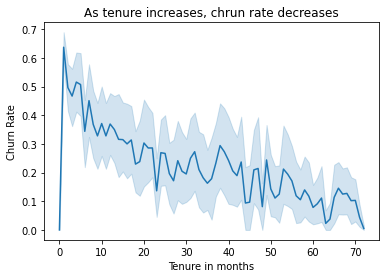

In [29]:
plt.title('As tenure increases, churn rate decreases')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure in months')
sns.lineplot(x='tenure',y='churn_Yes', data=train)

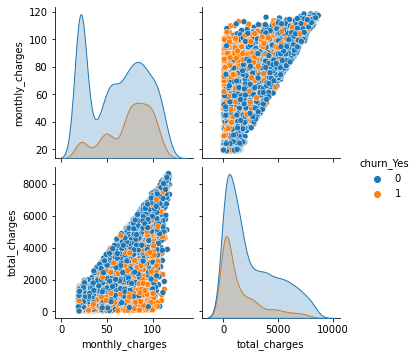

In [42]:
# higher monthly charges for customers who churned
sns.pairplot(train,vars=['monthly_charges', 'total_charges'], hue = 'churn_Yes')

In [119]:
train.head()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,has_partner,has_dependents,has_phone_service,has_single_line,has_multiple_lines,online_security_No internet service,has_online_security,online_backup_No internet service,has_online_backup,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,has_1yr_contract,has_2yr_contract,has_fiber,has_internet_service,pay_by_card,pay_echeck,pay_mailcheck
5642,4,3,3,0,23,25.60,514.75,0,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0
3338,3,2,2,0,27,100.50,2673.45,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0
4273,1,2,1,1,7,89.15,574.35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0
2382,3,1,1,0,47,58.60,2723.40,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2655,4,2,3,0,41,99.65,4220.35,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0


In [117]:
features = ['pay_by_card', 'pay_echeck', 'pay_mailcheck',
            'has_1yr_contract', 'has_2yr_contract', 'has_fiber']

In [120]:
for x in features:
    plt.show(sns.boxplot(data = telco_df, x = telco_df[x], y = 'tenure', hue = 'churn_Yes'))
    plt.tight_layout()
    

KeyError: 'pay_by_card'

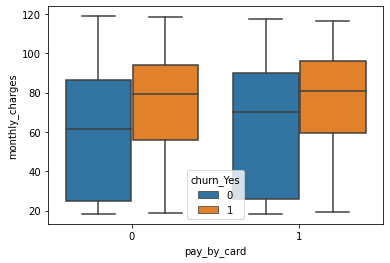

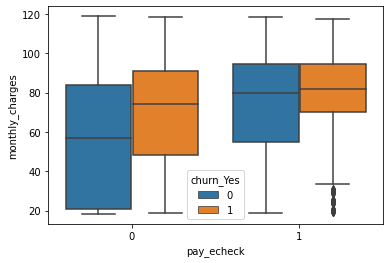

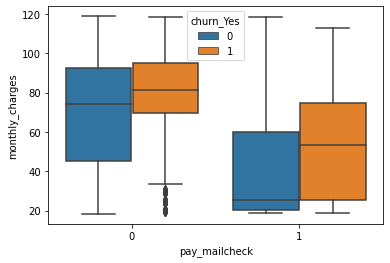

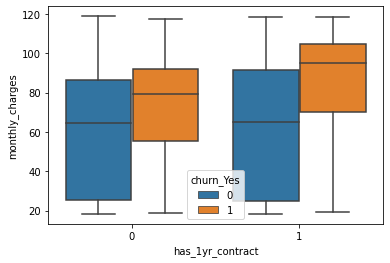

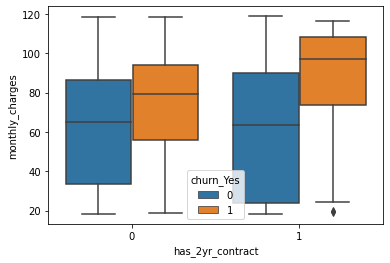

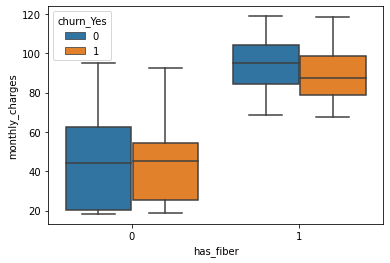

<Figure size 432x288 with 0 Axes>

In [29]:
# multivariate exploration
for x in features:
    plt.show(sns.boxplot(data = telco_df, x = telco_df[x], y = 'monthly_charges', hue = 'churn_Yes'))
    plt.tight_layout()
    

Takeaways:
- Median monthly charges the highest for 1 yr contract customers who churned
- Median monthly charges the highest for 2 yr contract customers who churned
- monthly charges alot higher for customers with fiber internet
    - their minimum is higher than the 75th percentile of customers without fiber internet
- customers who paid by monthly check had lower monthly charges than those who did 
    - fewer customers who did not pay by check churned
    - some outliers in monthly charges for churning customers who didn't pay by check
    - if I had more time, I would like to further investigate these outliers 

<AxesSubplot:xlabel='has_phone_service', ylabel='monthly_charges'>

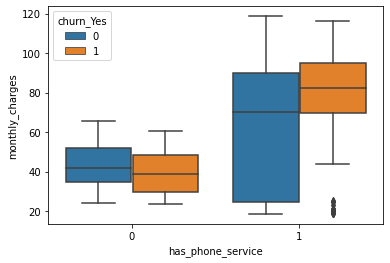

In [48]:
sns.boxplot(data = train, x = 'has_phone_service', y = 'monthly_charges', hue = 'churn_Yes')
# customers with phone service who churn have higher monthly charges

<AxesSubplot:xlabel='has_phone_service', ylabel='count'>

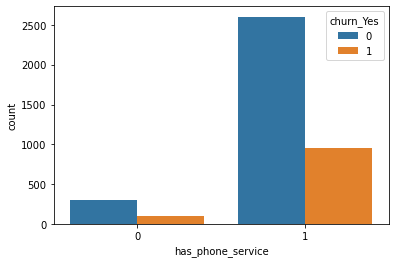

In [59]:
sns.countplot(data = train, x = 'has_phone_service', hue = 'churn_Yes')
# more customers with phone service
# about 35% customers with phone service churn 
# is churn independent of phone service >> chi sq test

<AxesSubplot:xlabel='has_internet_service', ylabel='count'>

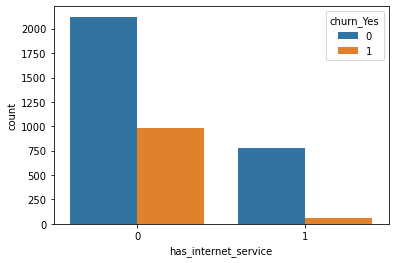

In [61]:
sns.countplot(data = train, x = 'has_internet_service', hue = 'churn_Yes')
# about 50% of customers who dont have internet churn
# churn dependent on not having internet?

<AxesSubplot:xlabel='has_fiber', ylabel='count'>

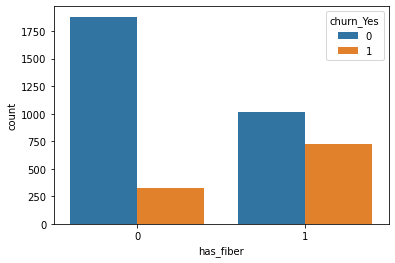

In [64]:
sns.countplot(data = train, x = 'has_fiber', hue = 'churn_Yes')
# about 70% of customers who have fiber churn

<AxesSubplot:xlabel='payment_type_id', ylabel='count'>

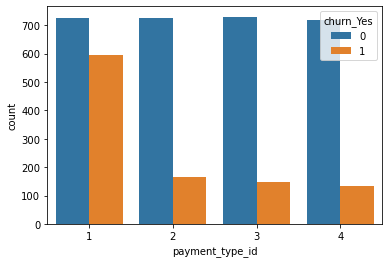

In [63]:
sns.countplot(data = train, x = 'payment_type_id', hue = 'churn_Yes')
# highest number of customers who churn use payment 1 
# churn is dependent on payment type?

<AxesSubplot:xlabel='has_fiber', ylabel='monthly_charges'>

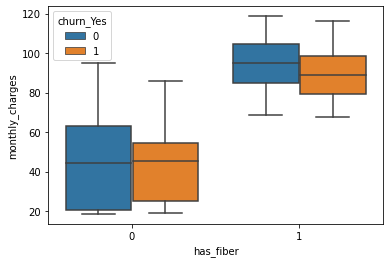

In [66]:
sns.boxplot(data = train, x = 'has_fiber', y = 'monthly_charges', hue = 'churn_Yes')
# higher monthly charges for customers who have fiber

<AxesSubplot:xlabel='monthly_charges', ylabel='churn_Yes'>

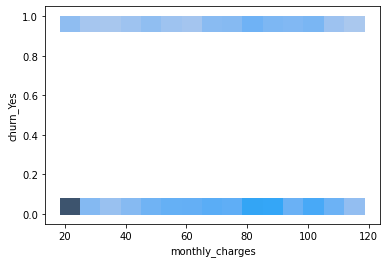

In [71]:
sns.histplot(data = train, x = 'monthly_charges', y = 'churn_Yes')

In [ ]:
cat_vars = ['gender_Male', 'senior_citizen']
quant_vars = ['monthly_charges']

In [ ]:
explore.explore_univariate(train, cat_vars, quant_vars)

In [ ]:
cat_vars = ['gender_Male', 'senior_citizen']
quant_vars = ['monthly_charges']
explore.explore_bivariate(train, 'churn_Yes', cat_vars, quant_vars, alternative_h='two-sided' )

In [ ]:
train.columns

In [ ]:
telco_df.contract_type_id.value_counts()

In [ ]:
cat_vars = ['contract_type_id', 'has_1yr_contract']
quant_vars = ['total_charges', 'monthly_charges']
explore.explore_bivariate(train, 'churn_Yes', cat_vars, quant_vars, alternative_h='two-sided' )

In [ ]:
cat_vars = ['pay_by_card', 'pay_echeck', 'pay_mailcheck', 'payment_type_id']
quant_vars = []
explore.explore_bivariate(train, 'churn_Yes', cat_vars, quant_vars, alternative_h='two-sided' )

In [ ]:
cat_vars = ['has_phone_service', 'has_internet_service']
quant_vars = []
explore.explore_bivariate(train, 'churn_Yes', cat_vars, quant_vars, alternative_h='two-sided' )

In [ ]:
cat_vars = ['has_2yr_contract', 'has_1yr_contract']
quant_vars = ['monthly_charges']
explore.explore_bivariate(train, 'churn_Yes', cat_vars, quant_vars, alternative_h='two-sided' )

In [ ]:
train.churn_Yes.value_counts().sort_index().plot.bar()
churn_rate = train.churn_Yes.mean()
plt.title(f'Overall churn rate: {churn_rate:.2%}')
plt.xlabel('Churned')
plt.ylabel('Number of customers')
plt.show()


Hypothesis:
    
h_null = churn rate is not dependent on internet service

h_alt = churn rate is dependent on internet service

In [ ]:
alpha = 0.05

In [ ]:
ct = pd.crosstab(train.has_internet_service, train.churn_Yes)
ct

In [ ]:
chi2_stat, p, degf, expected_internet = stats.chi2_contingency(ct)
print(expected_internet)
print(f"p-val: {p}")

In [ ]:
if p < alpha:
    print("We reject the null hypothesis. We have evidence to believe that churn rate is dependent on internet service.")
else:
    print("We fail to reject the null hypothesis. We have evidence to believe that churn rate is not dependent on internet service.")


Hypothesis:
h_null = no correlation between total charges and contract type 

h_alt = There is a correlation between total charges and contract type

In [ ]:
n = train.shape[0]     # number of observations in the train dataset
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
alpha = 1 - conf_interval

In [ ]:
corr, p = stats.pearsonr(train.total_charges, train.contract_type_id)
corr, p

In [ ]:
if p < alpha:
    print("We reject the null hypothesis. There is a correlation between monthly charges and contract type.")
else:
    print("We fail to reject the null hypothesis. There is no correlation between monthly charges and contract type.")

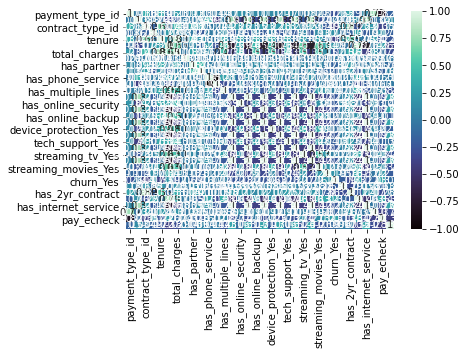

In [34]:
sns.heatmap(train.corr(), cmap='mako', annot=True)
plt.show()

## Model 

Because I am trying to predict the customers that will churn, the positive variable will be churn = 1 in my models.

Possible Outcomes:

TP: Predict that a customer will churn and they do
TN: Predict that a customer will not churn and they do not
FP: Predict that a customer will churn but they do not
FN: Predict that a customer will not churn but they do
I am trying to identify customers that will churn so I want to minimize false negatives. Accuracy will be the primary measure for selecting a top model, followed by recall.

### Setup the Baseline

The baseline was set to be the most frequently occurring value in the training split. The baseline was set to be no churn or 0 in the churn column. The baseline accuracy was found to be 73.47%.

In [9]:
# finding the most common value for the target variable in the training split
train.churn_Yes.value_counts()

0    2897
1    1046
Name: churn_Yes, dtype: int64

In [10]:
# setting the baseline equal to no churn
train['baseline'] = 0 

In [14]:
# calculating the baseline accuracy to compare our models to 
baseline_accuracy = (train.churn_Yes == train.baseline).mean()
print(f'The baseline accuracy is {baseline_accuracy:.2%}')

The baseline accuracy is 73.47%


In [16]:
# drop the baseline column from train df
train.drop(columns='baseline', inplace=True)

## Decision Tree Model

Model 1
- Create a model using 'has_internet_service', 'contract_type_id', 'monthly_charges', 'pay_by_card','pay_echeck',
           'payment_type_id','online_backup_No internet service','internet_service_type_id',
           'tenure'
- Check if the model beats the baseline

In [54]:
# split our X and y
X_train = train.drop(columns='churn_Yes')
y_train = train[['churn_Yes']]

In [55]:
# specify the features being used
features = ['has_internet_service', 'contract_type_id', 'monthly_charges', 'pay_by_card','pay_echeck',
           'payment_type_id','online_backup_No internet service','internet_service_type_id',
           'tenure']

In [58]:
# 1. Create the model
clf1 = DecisionTreeClassifier(max_depth=3, random_state=123)

In [59]:
# 2. fit the model 
clf1.fit(X_train[features], y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [60]:
# 3. Make predictions using the same features
y_pred = clf1.predict(X_train[features])

In [61]:
accuracy = clf1.score(X_train[features], y_train)

# create the confusion matrix
conf = confusion_matrix(y_train, y_pred)

# creating the classification report and transposing it
class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
conf = confusion_matrix(y_train, y_pred)

# true positive rate
tpr = conf[1][1] / conf[1].sum()

# false positive rate
fpr = conf[0][1] / conf[0].sum()

# true negative rate
tnr = conf[0][0] / conf[0].sum()

# false negative rate
fnr = conf[1][0] / conf[1].sum()

print(f'''
The accuracy for our model is {accuracy:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7865
The True Positive Rate is 0.296, The False Positive Rate is 0.0366,
The True Negative Rate is 0.963, and the False Negative Rate is 0.704



,precision,recall,f1-score,support
0,0.791324,0.963410,0.868929,2897.000000
1,0.745192,0.296367,0.424077,1046.000000
accuracy,0.786457,0.786457,0.786457,0.786457
macro avg,0.768258,0.629889,0.646503,3943.000000
weighted avg,0.779086,0.786457,0.750918,3943.000000


Model 1 had a higher overall accuracy of 79% on in sample data comapred to the baseline of 73%. However, it had a high false negative rate and therefore, a low recall score of 30%.

## Random Forest Model

Model 2
- Create a model using 'has_internet_service', 'contract_type_id', 'monthly_charges', 'pay_by_card','pay_echeck',
           'payment_type_id','online_backup_No internet service','internet_service_type_id',
           'tenure'
- Check if the model beats the baseline

In [86]:
# Create the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=30, 
                            random_state=123)

In [87]:
# fit model to training data
rf.fit(X_train[features], y_train)

RandomForestClassifier(max_depth=30, random_state=123)

In [88]:
# 3. Make predictions using the same features
y_pred2 = rf.predict(X_train[features])

In [89]:
accuracy = rf.score(X_train[features], y_train)

# create the confusion matrix
conf = confusion_matrix(y_train, y_pred2)

# creating the classification report and transposing it
class_report = pd.DataFrame(classification_report(y_train, y_pred2, output_dict=True)).T
conf = confusion_matrix(y_train, y_pred2)

# true positive rate
tpr = conf[1][1] / conf[1].sum()

# false positive rate
fpr = conf[0][1] / conf[0].sum()

# true negative rate
tnr = conf[0][0] / conf[0].sum()

# false negative rate
fnr = conf[1][0] / conf[1].sum()

print(f'''
The accuracy for our model is {accuracy:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.9937
The True Positive Rate is 0.988, The False Positive Rate is 0.00414,
The True Negative Rate is 0.996, and the False Negative Rate is 0.0124



,precision,recall,f1-score,support
0,0.995514,0.995858,0.995686,2897.00000
1,0.988517,0.987572,0.988044,1046.00000
accuracy,0.993660,0.993660,0.993660,0.99366
macro avg,0.992015,0.991715,0.991865,3943.00000
weighted avg,0.993658,0.993660,0.993659,3943.00000


Model 2 has a higher overall accuracy of 88% compared to model 1 (79%); this also beats the baseline
accuracy of 73%. The false negative rate is low at 29% and the recall score of 71%  is higher than that of model 1.

# KNN Model

Model 3
- Create a model using 'has_internet_service', 'contract_type_id', 'monthly_charges', 'pay_by_card','pay_echeck',
     'payment_type_id','online_backup_No internet service','internet_service_type_id',
     'tenure'
- Check if the model beats the baseline

In [46]:
# Create the model
knn = KNeighborsClassifier(n_neighbors=4)


In [56]:
# fit the model
knn.fit(X_train[features], y_train)


KNeighborsClassifier(n_neighbors=4)

In [58]:
# make predictions using the model
y_pred3 = knn.predict(X_train[features])

In [60]:
accuracy = knn.score(X_train[features], y_train)

# create the confusion matrix
conf = confusion_matrix(y_train, y_pred3)

# creating the classification report and transposing it
class_report = pd.DataFrame(classification_report(y_train, y_pred3, output_dict=True)).T
conf = confusion_matrix(y_train, y_pred3)

# true positive rate
tpr = conf[1][1] / conf[1].sum()

# false positive rate
fpr = conf[0][1] / conf[0].sum()

# true negative rate
tnr = conf[0][0] / conf[0].sum()

# false negative rate
fnr = conf[1][0] / conf[1].sum()

print(f'''
The accuracy for our model is {accuracy:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.8331
The True Positive Rate is 0.48, The False Positive Rate is 0.0394,
The True Negative Rate is 0.961, and the False Negative Rate is 0.52



,precision,recall,f1-score,support
0,0.836489,0.960649,0.894280,2897.000000
1,0.814935,0.479924,0.604091,1046.000000
accuracy,0.833122,0.833122,0.833122,0.833122
macro avg,0.825712,0.720286,0.749186,3943.000000
weighted avg,0.830771,0.833122,0.817299,3943.000000


Model 3 has an overall accuracy of 83% which is lower than Model 2 (88%) but higher than model 1 (79%); this also beats the baseline accuracy of 73%. The false negative rate is more than 50% and the recall score is about 48%. This is also lower than model 2 but higher than model 1.

# Logistic Regression 

- Create a model using 'has_internet_service', 'contract_type_id', 'monthly_charges', 'pay_by_card','pay_echeck', 'payment_type_id','online_backup_No internet service','internet_service_type_id', 'tenure'
- Check if the model beats the baseline

In [62]:
# create the model
logit = LogisticRegression(C=1, class_weight=None, 
                            random_state=123)

In [63]:
# fit the model 
logit.fit(X_train[features], y_train)

LogisticRegression(C=1, random_state=123)

In [64]:
# make predictions
y_pred4 = logit.predict(X_train[features])

In [65]:
accuracy = logit.score(X_train[features], y_train)

# create the confusion matrix
conf = confusion_matrix(y_train, y_pred4)

# creating the classification report and transposing it
class_report = pd.DataFrame(classification_report(y_train, y_pred4, output_dict=True)).T
conf = confusion_matrix(y_train, y_pred4)

# true positive rate
tpr = conf[1][1] / conf[1].sum()

# false positive rate
fpr = conf[0][1] / conf[0].sum()

# true negative rate
tnr = conf[0][0] / conf[0].sum()

# false negative rate
fnr = conf[1][0] / conf[1].sum()

print(f'''
The accuracy for our model is {accuracy:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7925
The True Positive Rate is 0.494, The False Positive Rate is 0.0998,
The True Negative Rate is 0.9, and the False Negative Rate is 0.506



,precision,recall,f1-score,support
0,0.831368,0.900242,0.864435,2897.000000
1,0.641439,0.494264,0.558315,1046.000000
accuracy,0.792544,0.792544,0.792544,0.792544
macro avg,0.736403,0.697253,0.711375,3943.000000
weighted avg,0.780983,0.792544,0.783227,3943.000000


Model 4 has an overall accuracy of 79% which is the same as model 1. This model, like all the other models, also beats our baseline of 73%. Model 1 has a recall score of 49% which is a lot lower than Model 2 but only slightly higher than Model 3.

Based on the models created so far, Model 2 utilizing random forest seems to be the best one with the highest overall accuracy as well as recall score.

In [76]:
# Create the model
rf2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

# fit model to training data
rf.fit(X_train[features], y_train)

# 3. Make predictions using the same features
y_pred5 = rf.predict(X_train[features])

In [77]:
accuracy = knn.score(X_train[features], y_train)

# create the confusion matrix
conf = confusion_matrix(y_train, y_pred5)

# creating the classification report and transposing it
class_report = pd.DataFrame(classification_report(y_train, y_pred5, output_dict=True)).T
conf = confusion_matrix(y_train, y_pred5)

# true positive rate
tpr = conf[1][1] / conf[1].sum()

# false positive rate
fpr = conf[0][1] / conf[0].sum()

# true negative rate
tnr = conf[0][0] / conf[0].sum()

# false negative rate
fnr = conf[1][0] / conf[1].sum()

print(f'''
The accuracy for our model is {accuracy:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.8331
The True Positive Rate is 0.714, The False Positive Rate is 0.0621,
The True Negative Rate is 0.938, and the False Negative Rate is 0.286



,precision,recall,f1-score,support
0,0.900862,0.937867,0.918992,2897.000000
1,0.805825,0.714149,0.757223,1046.000000
accuracy,0.878519,0.878519,0.878519,0.878519
macro avg,0.853344,0.826008,0.838107,3943.000000
weighted avg,0.875651,0.878519,0.876078,3943.000000


## Validation 

Testing the best performing model i.e Model 2 random forest on out of sample data.

In [78]:
# split our X and y for the validate dataset
X_validate = validate.drop(columns='churn_Yes')
y_validate = validate[['churn_Yes']]


In [79]:
# assign features being used (same as the ones in training dataset)
features = ['has_internet_service', 'contract_type_id', 'monthly_charges', 'pay_by_card','pay_echeck',
           'payment_type_id','online_backup_No internet service','internet_service_type_id',
           'tenure']

In [90]:
y_pred_val = rf.predict(X_validate[features])

In [91]:
#classification report
print(classification_report(y_validate, y_pred_val))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1242
           1       0.56      0.47      0.51       449

    accuracy                           0.76      1691
   macro avg       0.69      0.67      0.68      1691
weighted avg       0.75      0.76      0.75      1691



This model does not perform as well on out of sample data. Overall accuracy reduced to 79% and recall score to 50%

Let's try out of sample performance on the next best performing model which was model 3 using the knn algorithm

In [84]:
y_pred_val2 = knn.predict(X_validate[features])

In [85]:
#classification report
print(classification_report(y_validate, y_pred_val2))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1242
           1       0.62      0.35      0.45       449

    accuracy                           0.77      1691
   macro avg       0.71      0.64      0.65      1691
weighted avg       0.75      0.77      0.75      1691



The overall accuracy and recall scores are not dropping as much as model 4 in out of sample data for model 3 which leads me to conclude that Model 2 might be overfit and Model 3 might be the better model.